# Trabajo Data Science

In [160]:
import pandas                   as pd
from   scipy import stats
import seaborn                  as sns
import matplotlib               as mpl
import matplotlib.pyplot        as plt
import numpy                    as np
import chart_studio.plotly      as py
import statsmodels.formula.api  as sm
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble           import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
import os

from bokeh.resources import INLINE
import bokeh.io
from bokeh import *
import pingouin
bokeh.io.output_notebook(INLINE)

## Introducción

**Contexto empresariaal** 

Un gerente de negocios de una cartera de tarjetas de crédito para consumidores se enfrenta al problema de la pérdida de clientes. Quieren analizar los datos para descubrir la razón detrás de esto y aprovecharlo para predecir qué clientes tienen más probabilidades de abandonar.

**Objetivos**

 En este proyecto se intentará extraer del conjunto de datos el comportamiento de ciertos clientes del banco. Con el fin de proporcionar al departamentos pretinentes la información que necesitarían para comprender mejor a sus clientes. Como asi tambien se buscará predecir quiénes se van a dar de baja para poder acercarse al cliente proactivamente y ofrecerles mejores servicios, y revertir sus decisiones en la dirección opuesta. Identificar patrones y tendencias que pueden ayudar a los bancos a mejorar sus estrategias de retención de clientes y reducir la tasa de abandono del banco

**Contexto analítico** 

Se le proporciona un archivo CSV, este conjunto de datos consta de 10.000 clientes que mencionan su edad, salario, estado civil, límite de la tarjeta de crédito, categoría de la tarjeta de crédito, etc. Hay casi 18 características. Solo se proporciona el 16,07% de clientes que se han dado de baja.

Realizará las siguientes tareas con los datos:

-Leer, transformar y preparar datos para su visualización

-Realizar análisis y construir visualizaciones de los datos para identificar patrones en el conjunto de datos.

**Problema comercial**

 Proporcionar visualizaciones que respondan las preguntas hipotesis planteadas en el apartado siguiente.

**Preguntas Hipotesis**

 En base a las primeras visualizaciones de la tabla csv de esta cartera de clientes, se plantean las siguientes hipotesis:

- ¿Cuál es el impacto del nivel educativo en el salario?
- ¿Existe alguna influencia del género en el salario y/o Limite de credito?
- ¿Qué género tiene más probabilidades de abandonar el banco?
- ¿Los estudios superiores implican más responsabilidades con su cuenta?
- ¿Un mayor ingreso implica menos deudas?
- ¿Qué hace que una persona abandone el banco?


## Data Analysis

In [161]:
url = 'https://raw.githubusercontent.com/GabyWesker/DataScienceProject/main/BankChurners.csv'
Bankchurners = pd.read_csv(url)
Bankchurners.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


**Descripción de columnas:** 


**CLIENTUM:** Identificador único para cada cliente. (Int)

**Attrition_Flag:** Marca que indica si el cliente se ha ido o no.
(Booleano)

**Customer_Age:** Edad del cinete.(Int)

**Gender:** Genero del cliente. (String)

**Dependent_count:** número de dependientes que tiene el cliente. (Int)

**Education_Level:** Nivel de educación del cliente. (Sting)

**Marital_Status:** Estado civil. (String)

**Income_Category:** categoría de ingresos. (String)

**Card_Category:** tipo de tarjeta del cliente. (String)

**Months_on_book:** Cuanto tiempo ha estado el cliente en los libros.
(Int)

**Total_Relationshop_Count:** Número total de relaciones que el cliente
tiene con el proveedor de la tarjeta de crédito. (Int)

**Months_Inactive_12_mon:** número de meses que el cliente ha estado
inactivo en los últimos 12 meses. (Int)

**Contacts_Count_12_mon:** Número de contactos que el cliente ha
tenido en los últimos doce meses. (Int)

**Credit_Limit:** Límite de crédito del cliente. (Int)

**Total_Revolving_Bal:** Saldo rotatorio total del cliente. (Int)

**Avg_Open_To_Buy:** Relación media de apertura comprar del cliente.
(Int)

**Tota_Amt_Chng_Q4_Q1:** Importe total cambiado del trimestre 4 al
trimestre 1. (Int)

**Total_Trans_Amt:** Importe total de la transacción. (Int)

**Total_Trans_Ct:** Recuento total de transacciones. (Int)

**Total_Ct_Chng_Q4_Q1:** El recuento total cambió del trimestre 4 al
trimestre 1 (Int)

**Avg_Utilization_Ratio:** Índice de utilización promedio del cliente.
(Int)

**Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Coun
t_12_mon_Dependent_count_Education_Level_Months_Inactive_12_
mon_1:** Clasificación Bayes para predecid si alguien abandonara o no
en función de características. (Int)

Drop de Columnas

In [162]:
Bankchurners = Bankchurners.drop(columns = ['CLIENTNUM', 
              'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 
             'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2']
             )
Bankchurners.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

_En primera instancia de decidio hacer un drop de las columas irrelevantes para el analisis en cuestion_

### **Analisis de variables categororicas**

Columnas categoricas y numericas



In [163]:
cat_col = [x for x in Bankchurners.columns if Bankchurners[x].dtype == 'O'] #categoricas que no contengan numeros
num_col = [x for x in Bankchurners.columns if x not in cat_col] #numericas lo contrario.

print('cat_col : {} \n\
num_col : {}'.format(len(cat_col), len(num_col)))

cat_col : 6 
num_col : 14


<ipython-input-164-5c2c31f86fd0>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(tmp['index'], rotation=90)
<ipython-input-164-5c2c31f86fd0>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(tmp['index'], rotation=90)
<ipython-input-164-5c2c31f86fd0>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(tmp['index'], rotation=90)
<ipython-input-164-5c2c31f86fd0>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(tmp['index'], rotation=90)
<ipython-input-164-5c2c31f86fd0>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(tmp['index'], rotation=90)
<ipython-input-164-5c2c31f86fd0>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(tmp['index'], rotation=90)


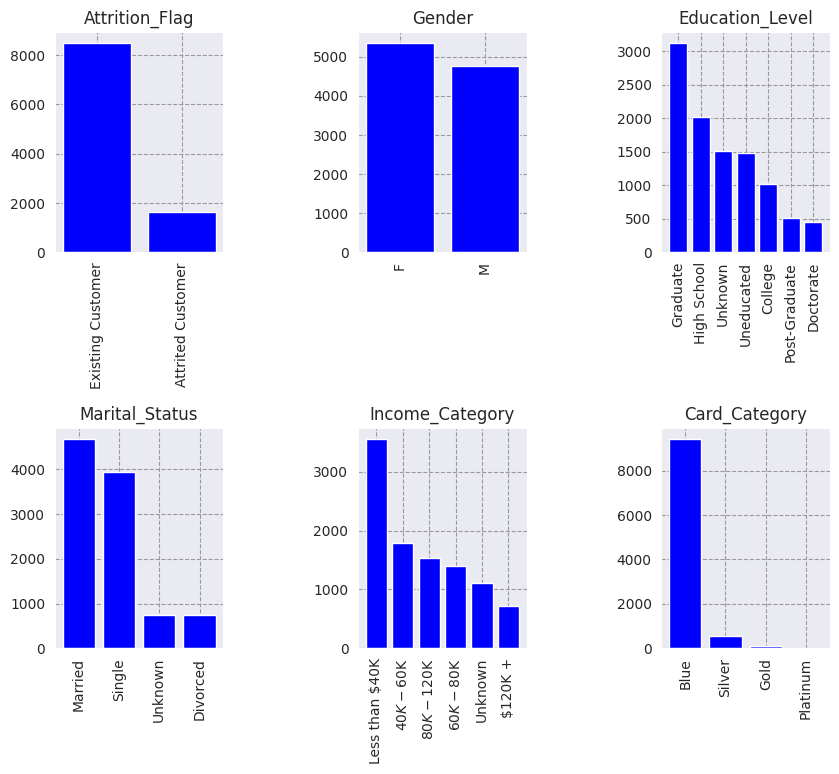

In [164]:
fig = plt.figure(figsize=(10, 8))
fig.subplots_adjust(hspace=0.8, wspace=0.8)
for i,var in enumerate(cat_col):
    tmp = Bankchurners[var].value_counts().reset_index()
    ax = fig.add_subplot(2, 3, i+1)
    ax.bar(tmp['index'], tmp[var], color='blue')
    ax.set_title(var)
    ax.set_xticklabels(tmp['index'], rotation=90)

_Un breve analisis de las variables categoricas y su distribucion en el dataset_

### **Analisis Variable Educación**

**Distribución Educacional**

In [165]:
Education_Counts = Bankchurners["Education_Level"].value_counts()

Text(0.5, 1.0, 'Piechart Distribucion Educativa')

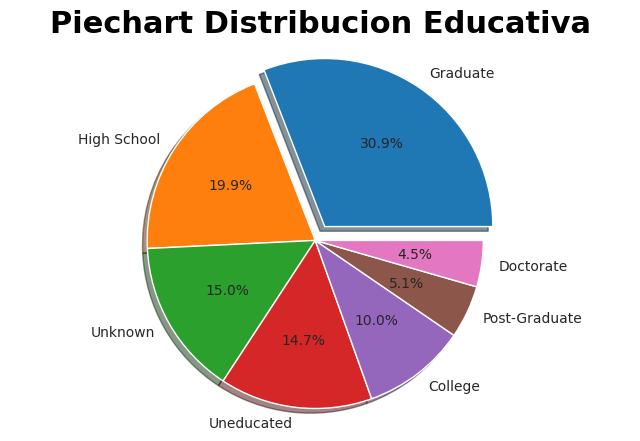

In [166]:
fig,ax = plt.subplots(figsize =(8, 5))
explode = (0.1, 0, 0, 0, 0, 0, 0)
ax.pie (
    Education_Counts, 
    explode = explode, 
    labels=Education_Counts.index,
    autopct='%1.1f%%', 
    shadow = True
    )
ax.axis('equal')
ax.set_title('Piechart Distribucion Educativa',
             color = "black", 
             weight = "bold", 
             fontsize=22
             )

**Distribución Educacional en base a nivel de ingresos**

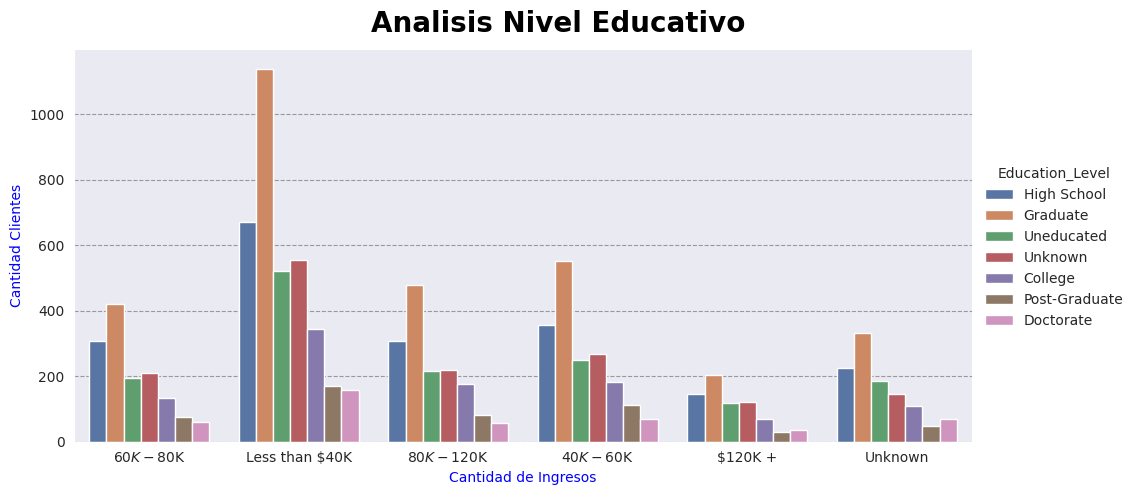

In [167]:
ax = sns.catplot(x="Income_Category", 
                hue="Education_Level",
                data=Bankchurners, 
                kind="count",
                height=5, aspect=2,
                palette= "deep"
                )
ax.fig.subplots_adjust(top=.9)
ax.fig.suptitle('Analisis Nivel Educativo',
            color = "black", 
             weight = "bold", 
             fontsize=20,
             )
ax.set(xlabel='Cantidad de Ingresos', 
      ylabel='Cantidad Clientes')
ax.set_titles(col_template="{col_name} ")
sns.set_style(style="darkgrid",
              rc={"grid.color": ".6"})
sns.set_style(rc={"grid.linestyle": ":"})
sns.set_style(rc={"axes.labelweight": "normal"})
sns.set_style(rc={"axes.linewidth": "0.5"})
sns.set_style(rc={"grid.linestyle": "--"})
sns.set_style(rc={"grid.linewidth": "0.5"})
sns.set_style(rc={"font.fantasy": "Comic Sans MS"})
sns.set_style(rc={"font.serif": "Utopia"}) 

_En el grafico observado la cartera de clientes esta compuesta mayormente por clientes con ingresos menores a $40k y en su mayoria graduados_

**Influencia educacional en relación al banco**

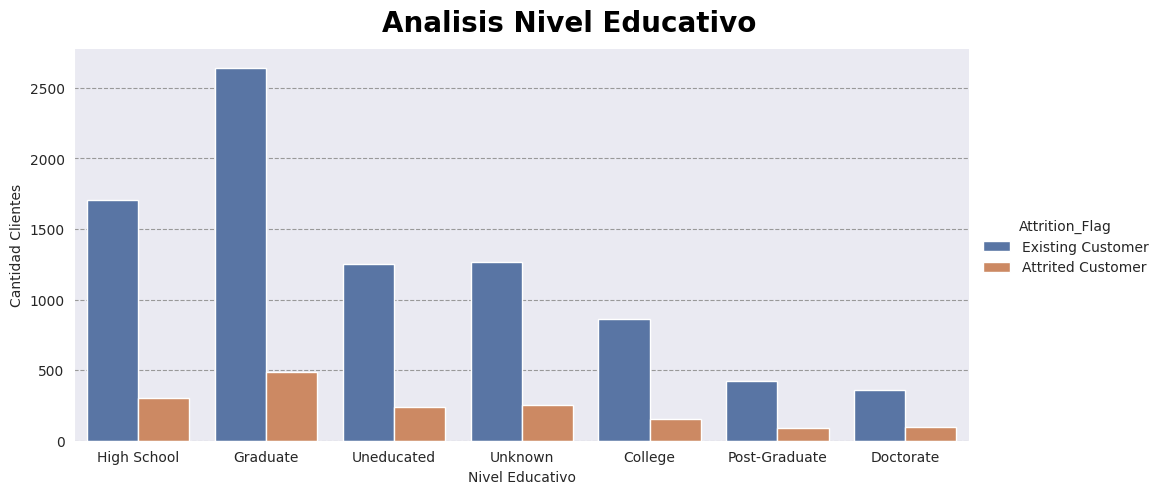

In [168]:
ax = sns.catplot(x="Education_Level", 
                hue="Attrition_Flag",
                data=Bankchurners, 
                kind="count",
                height=5, aspect=2,
                palette= "deep"
                )
ax.fig.suptitle('Analisis Nivel Educativo',
            color = "black", 
             weight = "bold", 
             fontsize=20,
             )
ax.fig.subplots_adjust(top=.9)
ax.set(xlabel='Nivel Educativo', 
      ylabel='Cantidad Clientes')
ax.set_titles(col_template="{col_name} ")

_En base al grafico obtenido, no hay una marcada diferencia entre el nivel educativo del cliente y su fin de relacion con el banco. Se observan porcentajes similares en cada categoría._

### **Analisis Variable Edad**

**Edad media**

In [169]:
Edad_Media = Bankchurners["Customer_Age"].mean()
print (Edad_Media)

46.32596030413745


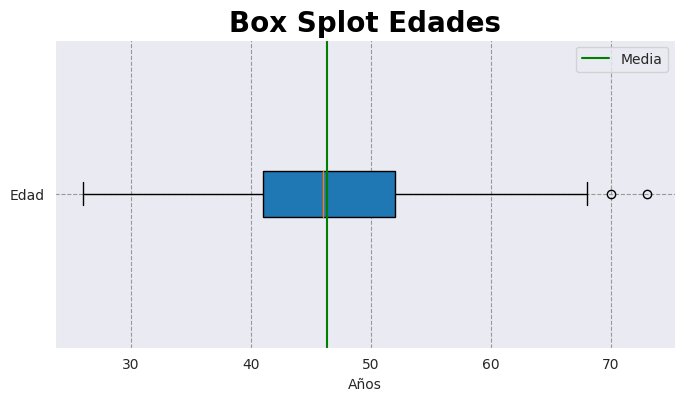

In [170]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.boxplot(x=Bankchurners["Customer_Age"],
           patch_artist= True,
            vert= False,
            labels=["Edad"],
            )         
ax.set_title("Box Splot Edades",
            color = "black", 
             weight = "bold", 
             fontsize=20,
             )
ax.set_xlabel('Años')
plt.axvline(x=Edad_Media, 
            color="g", 
            label="Media",
            )
plt.legend()
plt.show()

_Se Utilizo la línea verde por donde ocupa el valor la media_

-0.033605016317173456

Text(0.5, 1.0, 'Cantidad clientes segun edad')

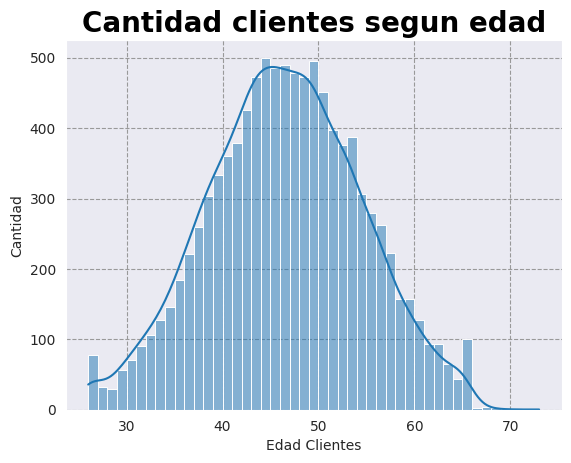

In [171]:
display(Bankchurners['Customer_Age'].skew())
ax = sns.histplot(Bankchurners.Customer_Age,kde=True,)
ax.set(xlabel='Edad Clientes', 
      ylabel='Cantidad')
ax.set_title("Cantidad clientes segun edad",
            color = "black", 
             weight = "bold", 
             fontsize=20,
             )

Cutomer_Age std: 8.016814032549028


[Text(0.5, 0, 'Edad Clientes'), Text(0, 0.5, 'Cantidad')]

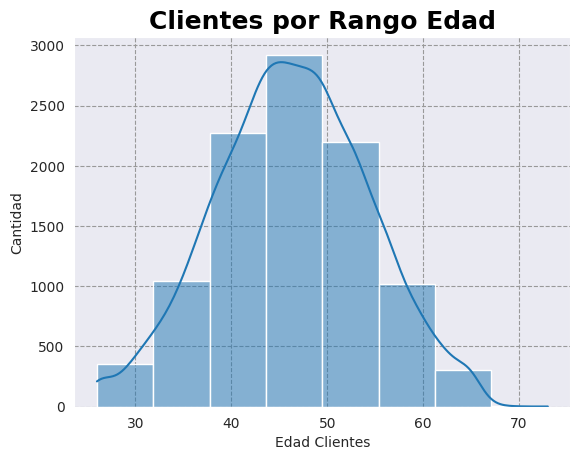

In [172]:
print(f"Cutomer_Age std: {Bankchurners['Customer_Age'].std()}"
      )
ax = sns.histplot(Bankchurners.Customer_Age,
             kde=True, 
             bins=int(Bankchurners['Customer_Age'].std()),
             )
ax.set_title("Clientes por Rango Edad",
            color = "black", 
             weight = "bold", 
             fontsize=18,
             )
ax.set(xlabel='Edad Clientes', 
      ylabel='Cantidad')

_Por lo que puede observarse en el histograma, entre los 40 a 50 años se encuentra la mayor cantidad de clientes (la media se encuentra en 46,32)_

In [173]:
Bankchurners['Customer_Age_period'] = pd.cut(np.array(Bankchurners['Customer_Age']), 
                                              bins=int(Bankchurners.Customer_Age.std()),
                                              precision=0
                                              )

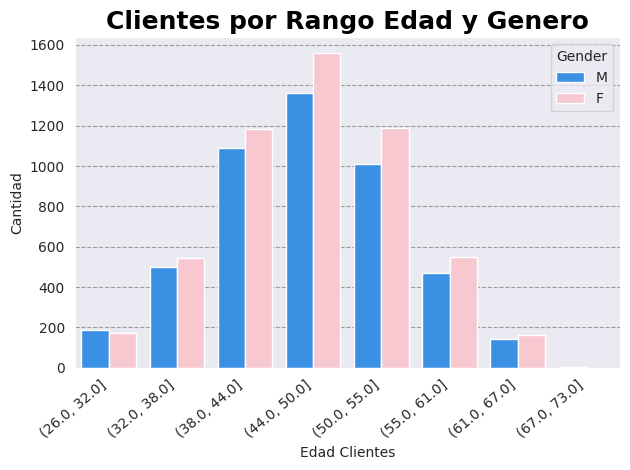

In [174]:
ax = sns.countplot(x="Customer_Age_period", 
                    hue='Gender', 
                    data=Bankchurners,
                    palette=['dodgerblue',"pink"],
                    )
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set_title("Clientes por Rango Edad y Genero",
            color = "black", 
             weight = "bold", 
             fontsize=18,
             )
ax.set(xlabel='Edad Clientes', 
      ylabel='Cantidad')
plt.tight_layout()

_Por medio de la grafica se pueden observar una mayor cantidad de clientes sexo femenino en los rangos mas relevantes 38 a 55 años_

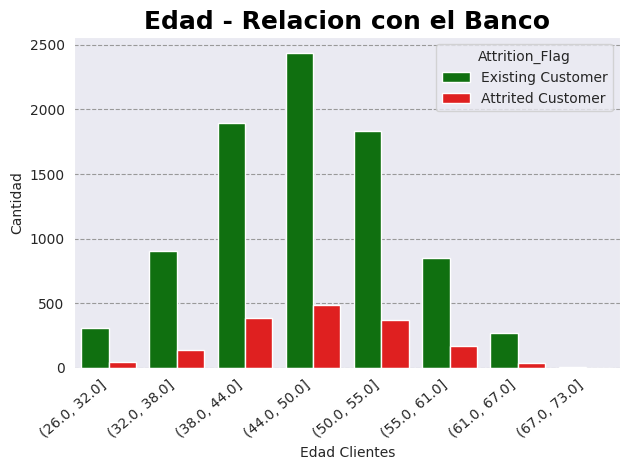

In [175]:
ax = sns.countplot(x="Customer_Age_period", hue='Attrition_Flag', data=Bankchurners, palette=['green',"red"])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set_title("Edad - Relacion con el Banco",
            color = "black", 
             weight = "bold", 
             fontsize=18,
             )
ax.set(xlabel='Edad Clientes', 
      ylabel='Cantidad')
plt.tight_layout()

_En el grafico puede observarse que no hay tendencia de edad entre clientes existentes y exclientes. Es decir no es un parametro relevante, ambos atributos del grafico tienen el mismo comportamiento._

### **Analisis Variable Género**

In [176]:
Edad_Genero = pd.crosstab(
    Bankchurners['Customer_Age'], 
    Bankchurners["Gender"], 
    margins = True, 
    margins_name = "Total",
    )
Edad_Genero.head()

Gender,F,M,Total
Customer_Age,,,
26,39,39,78
27,19,13,32
28,13,16,29
29,22,34,56
30,33,37,70


In [177]:
pd.crosstab(
    Bankchurners['Gender'], 
    Bankchurners['Attrition_Flag'], 
    margins = True, 
    margins_name = "Total",
    )

Attrition_Flag,Attrited Customer,Existing Customer,Total
Gender,,,
F,930,4428,5358
M,697,4072,4769
Total,1627,8500,10127


**Genero - Tipo de tarjeta**

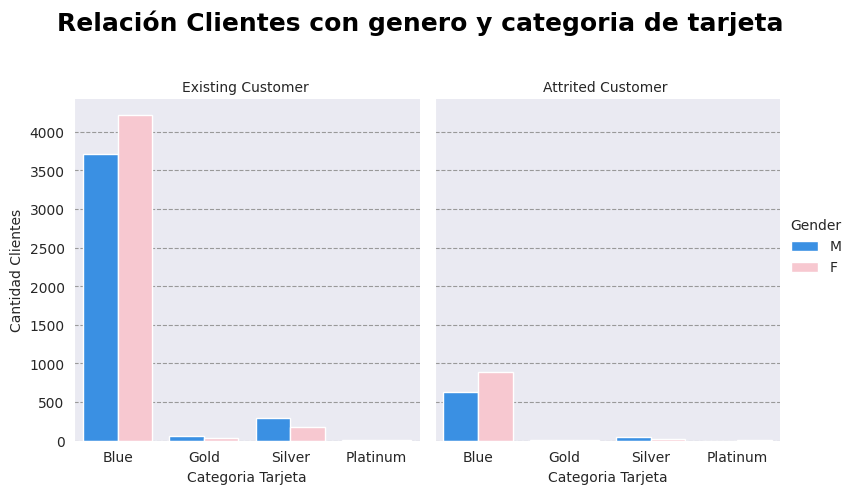

In [178]:
ax = sns.catplot(x="Card_Category", 
                hue="Gender", 
                col="Attrition_Flag",
                data=Bankchurners, 
                kind="count",
                height=5, aspect=.8,
                palette=['dodgerblue',"pink"],
                )
ax.fig.suptitle('Relación Clientes con genero y categoria de tarjeta',
            color = "black", 
             weight = "bold", 
             fontsize=18,
             )
ax.fig.subplots_adjust(top=.8)
ax.set(xlabel='Categoria Tarjeta', 
      ylabel='Cantidad Clientes')
ax.set_titles(col_template="{col_name} ")

_Por lo que se observa en la grafica, no hay un patron visible que pueda determinar si cierto tipo de tarjeta lleva al cliente a darse de baja en el banco_

**Relacion Género - Banco**

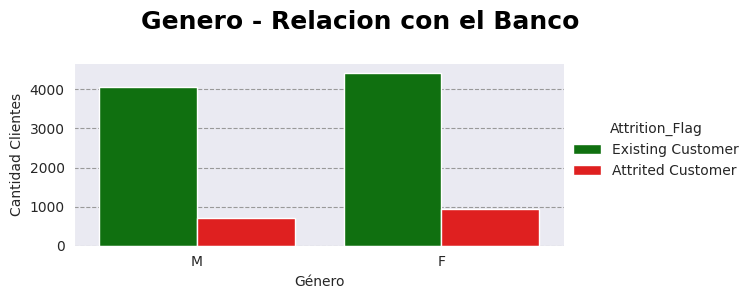

In [179]:
ax = sns.catplot(x="Gender", 
                hue="Attrition_Flag",
                data=Bankchurners, 
                kind="count",
                height=3, aspect=2,
                palette=['green',"red"]
                )
ax.fig.subplots_adjust(top=.8)
ax.fig.suptitle('Genero - Relacion con el Banco',
            color = "black", 
             weight = "bold", 
             fontsize=18,
             )
ax.fig.subplots_adjust(top=.8)
ax.set(ylabel='Cantidad Clientes',
       xlabel= "Género")
ax.set_titles(col_template="{col_name} ")

_Se observa que el porcentaje de mujeres y hombres que se retiran en la tarjeta es muy similiar, no se puede concluir una relacion en base al genero._

### **Analisis Variable Limite de credicticio**

**Analisis teniendo en cuenta la Edad y Genero**

[Text(0.5, 0, 'Edad Clientes'), Text(0, 0.5, 'Limite credicticio')]

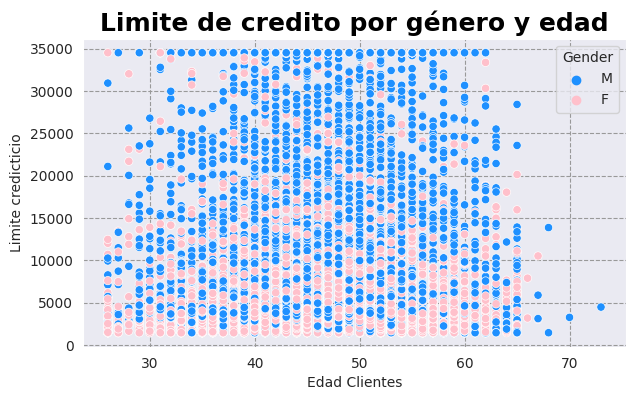

In [180]:
fig, ax = plt.subplots(figsize=(7, 4))  
sns.scatterplot(x= Bankchurners['Customer_Age'], 
                y = Bankchurners['Credit_Limit'], 
                data=Bankchurners, 
                hue="Gender", 
                palette=['dodgerblue',"pink"],
                )
ax.set_title("Limite de credito por género y edad",
            color = "black", 
             weight = "bold", 
             fontsize=18,
             )
ax.set(xlabel='Edad Clientes', 
      ylabel='Limite credicticio')


_En el grafico puede observarse un patron a simplevista definido, que los hombres obtienen mayor limite de credito que las mujeres.
Es el unico patron encontrado con una diferencia de género._

### **HeatMap entre 2 variables INT**

<Axes: >

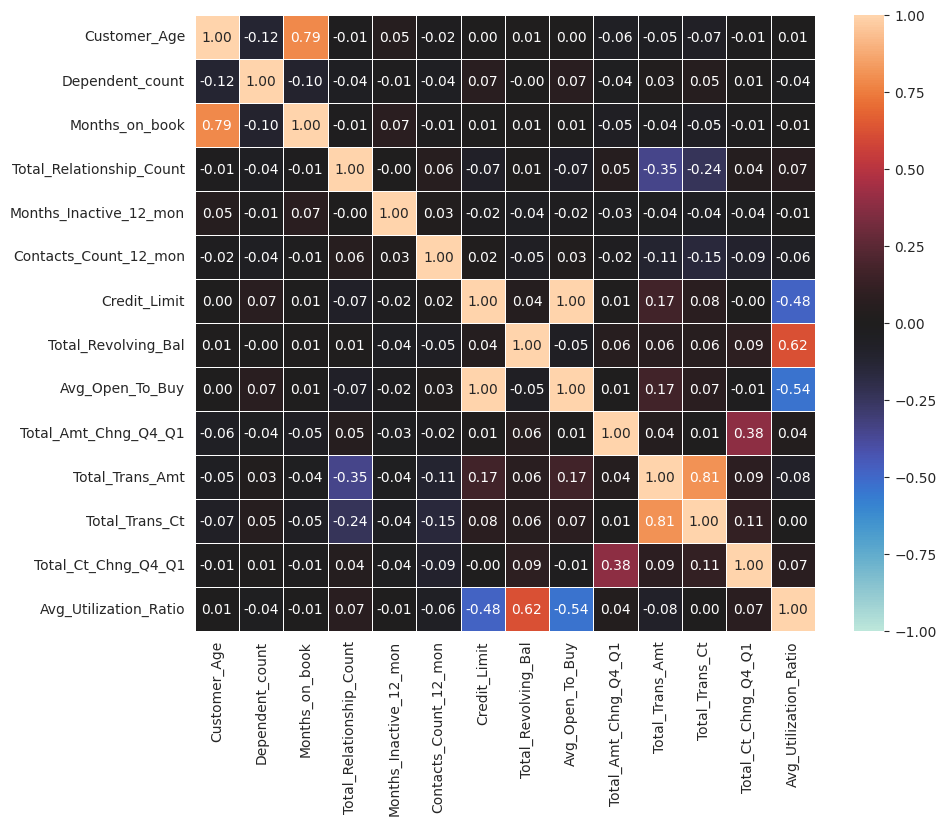

In [181]:

plt.figure(figsize=(10,8))
sns.heatmap(Bankchurners[num_col].corr(), 
            vmin=-1.0, 
            vmax=1.0, 
            linewidths=0.5, 
            cmap='icefire', 
            annot=True, 
            fmt='.2f',
            )

_Por medio del heatmap puede observarse poca relacion entre variables numéricas (INT)._

#### **Relacion de edad - Meses operando**

Text(0, 0.5, 'Meses')

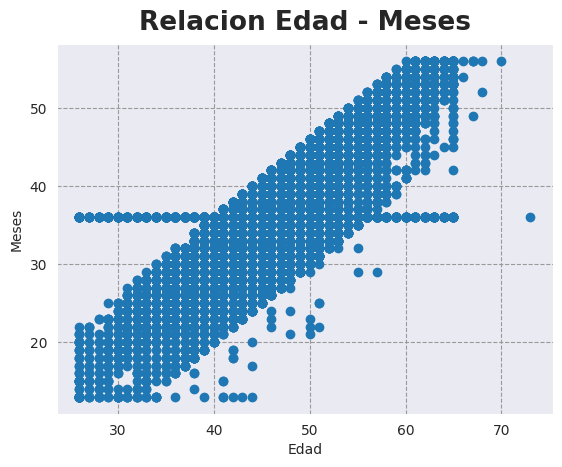

In [182]:
plt.scatter(Bankchurners['Customer_Age'],Bankchurners['Months_on_book'])
plt.title("Relacion Edad - Meses",
           fontsize=19, 
           verticalalignment='bottom', 
             weight = "bold",
           )
plt.xlabel("Edad")
plt.ylabel("Meses")

_Conclusion simple de dicho grafico de relacion entre la edad y los meses activos del cliente. Mientras mas edad tiene ese cliente tiende a tener mayor cantidad de meses operando con la tarjeta, de igualmanera pueden observarse pocos outliers._

#### **Relacion Cantidad de operaciones efectuadas segun comportamiento**

[Text(0.5, 0, 'Avg Utilization Ratio'), Text(0, 0.5, 'Total Revolving Ball')]

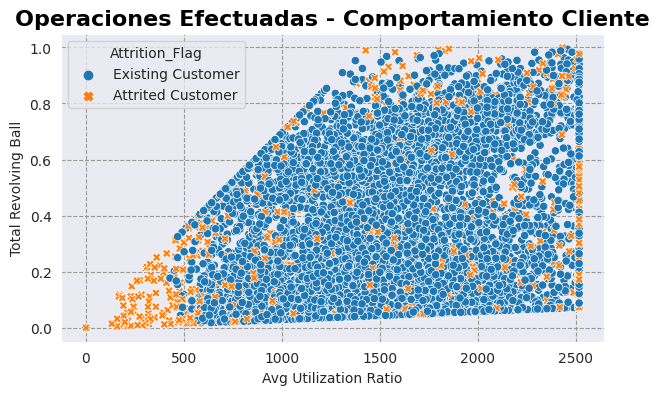

In [183]:
fig, ax = plt.subplots(figsize=(7, 4))  
sns.scatterplot(x= Bankchurners['Total_Revolving_Bal'], 
                y = Bankchurners['Avg_Utilization_Ratio'],
                  data=Bankchurners,
                  hue="Attrition_Flag",
                  style="Attrition_Flag",
                  )
ax.set_title("Operaciones Efectuadas - Comportamiento Cliente",
            color = "black", 
             weight = "bold", 
             fontsize=16,
             )
ax.set(xlabel='Avg Utilization Ratio', 
      ylabel='Total Revolving Ball')

_En conclusion del scater bivariado, la tendencia que se puede observar es que en su mayoria los clientes que solicitan la baja de la tarjeta, tienen menos operaciones efectuadas en el ultimo tiempo._

##Abrol de decisión

### Preparación

In [184]:
le = LabelEncoder()
Bankchurners['Marital_Status'] = le.fit_transform(Bankchurners['Marital_Status'])
Bankchurners['Attrition_Flag'] = le.fit_transform(Bankchurners['Attrition_Flag'])
Bankchurners['Gender'] = le.fit_transform(Bankchurners['Gender'])
Bankchurners['Education_Level'] = le.fit_transform(Bankchurners['Education_Level'])
Bankchurners['Card_Category'] = le.fit_transform(Bankchurners['Card_Category'])

_Lo primero que hice fue mediante labelencoder pasar las variables a numericas. La columna Income_Category (Ingresos), se descarto, ya que son muchos valores diferentes e imposibilita el analisis._

In [185]:
Bankchurners = Bankchurners.drop(columns=['Income_Category'])
Bankchurners = Bankchurners.drop(columns=['Customer_Age_period'])

_Se Hizo un drop de dicha columna y Customer_Age_period (que fue creada para analisis graficos)_

In [186]:
X = Bankchurners.drop(['Attrition_Flag'], axis=1)
y = Bankchurners['Attrition_Flag']
# Divido los datos en características y variable objetivo (Y)

In [187]:
Bankchurners.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,1,45,1,3,3,1,0,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,1,49,0,5,2,2,0,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,1,51,1,3,2,1,0,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,1,40,0,4,3,3,0,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,1,40,1,3,5,1,0,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


_Verificacion que toda la DB esta descripta en valores numéricos._

In [188]:
# Entreno un modelo de bosque aleatorio para determinar la importancia de cada característica
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

RandomForestClassifier(random_state=42)

_**n_estimators=100:** el número de árboles en el bosque aleatorio, en este caso se están utilizando 100 árboles._

_**random_state=42:** un valor utilizado para inicializar el generador de números aleatorios, lo que garantiza que se obtengan los mismos resultados cada vez que se ejecute el código con estos mismos parámetros._


### Reduccion dimensionalidad

Importancia de cada característica

In [189]:
importances = rf.feature_importances_

In [190]:
feature_importances = pd.DataFrame({'feature': X.columns, 'importance': importances})

In [191]:
feature_importances = feature_importances.sort_values('importance', ascending=False)

In [192]:
print(feature_importances)

                     feature  importance
14           Total_Trans_Amt    0.192999
15            Total_Trans_Ct    0.175791
11       Total_Revolving_Bal    0.112442
16       Total_Ct_Chng_Q4_Q1    0.109052
7   Total_Relationship_Count    0.064860
13      Total_Amt_Chng_Q4_Q1    0.064848
17     Avg_Utilization_Ratio    0.062603
0               Customer_Age    0.033720
10              Credit_Limit    0.032990
12           Avg_Open_To_Buy    0.031266
9      Contacts_Count_12_mon    0.026493
8     Months_Inactive_12_mon    0.025424
6             Months_on_book    0.024610
2            Dependent_count    0.012376
3            Education_Level    0.010461
1                     Gender    0.008855
4             Marital_Status    0.008846
5              Card_Category    0.002366


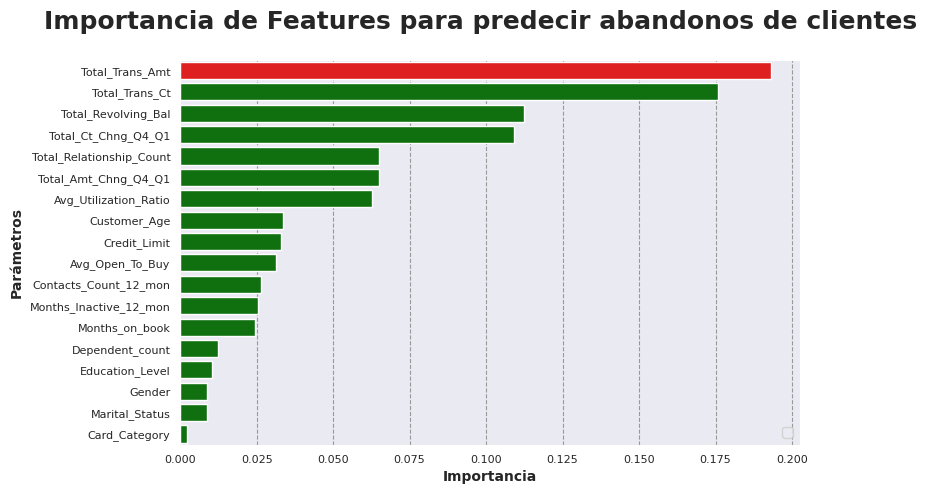

In [193]:
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111)

values = feature_importances.importance   
sns.barplot(y=feature_importances.feature,
            x=values,
            palette=['green' if (x < max(values)) else 'red' for x in values],
            ax=ax)

fig.suptitle("Importancia de Features para predecir abandonos de clientes", fontsize=18, fontweight='bold')
ax.set_xlabel("Importancia", fontsize=10, fontweight='bold')
ax.set_ylabel("Parámetros", fontsize=10, fontweight='bold')
ax.tick_params(labelsize=8)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, loc="lower right", fontsize=10)

plt.show()


_Esta grafica refleja la importancia de cada categoria, es fundamental entenderla para ver donde estan los puntos claves a la hora de predecir el comportamiento del cliente. Total_Trans_Amt (Importe total de la transacción) es la variable que mayor grado de importancia tiene; mientras que Card_Category (Categoria de tarjeta) la que menos._

In [194]:
# Selecciono las 10 características más importantes
important_features = feature_importances['feature'][:10].tolist()

In [195]:
# Agrego nuevamente la columna Attrition Flag
NuevoDF = Bankchurners[important_features + ['Attrition_Flag']]

In [196]:
NuevoDF.head()

,Total_Trans_Amt,Total_Trans_Ct,Total_Revolving_Bal,Total_Ct_Chng_Q4_Q1,Total_Relationship_Count,Total_Amt_Chng_Q4_Q1,Avg_Utilization_Ratio,Customer_Age,Credit_Limit,Avg_Open_To_Buy,Attrition_Flag
0,1144,42,777,1.625,5,1.335,0.061,45,12691.0,11914.0,1
1,1291,33,864,3.714,6,1.541,0.105,49,8256.0,7392.0,1
2,1887,20,0,2.333,4,2.594,0.000,51,3418.0,3418.0,1
3,1171,20,2517,2.333,3,1.405,0.760,40,3313.0,796.0,1
4,816,28,0,2.500,5,2.175,0.000,40,4716.0,4716.0,1


In [197]:
NuevoDF.shape

(10127, 11)

Nuevo DB con las columnas mas relevantes y la variable objetivo (Attrition_Flag)

 ### Validar el modelo con un conjunto de datos de prueba

In [198]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

_Divido los datos en conjuntos de entrenamiento y prueba. En este caso proporciono 70% para el conjunto de entrenamiento y el 30% para el conjunto de prueba._

In [199]:
#Predicciones en el conjunto de prueba
y_pred = rf.predict(X_test)

In [200]:
# Calculo la precisión, recuperación, puntuación F1 y área bajo la curva ROC
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

In [201]:
print('Accuracy: ', accuracy)
print('Precision: ', precision)
print('Recall: ', recall)
print('F1 score: ', f1)
print('ROC AUC score: ', roc_auc)

Accuracy:  1.0
Precision:  1.0
Recall:  1.0
F1 score:  1.0
ROC AUC score:  1.0


In [202]:
X_test.shape, y_test.shape

((3039, 18), (3039,))

In [203]:
y_pred.shape

(3039,)

In [204]:
X_test

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
3781,48,0,3,5,2,0,39,4,3,4,2991.0,1508,1483.0,0.703,3734,64,0.882,0.504
2922,59,1,1,5,2,0,53,5,5,4,2192.0,1569,623.0,0.706,4010,79,0.717,0.716
5070,37,0,2,2,0,0,36,4,3,3,1734.0,987,747.0,0.879,4727,67,0.914,0.569
7246,47,1,3,1,0,0,36,4,2,3,4786.0,1516,3270.0,0.940,4973,74,0.850,0.317
623,42,1,3,6,2,0,33,3,3,2,3714.0,2170,1544.0,0.524,1454,35,0.522,0.584
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6621,49,1,4,3,2,0,30,5,3,3,1579.0,900,679.0,0.592,4354,70,0.707,0.570
9535,39,1,1,2,2,1,36,1,3,2,34516.0,1662,32854.0,0.751,13578,105,0.615,0.048
4638,56,1,2,1,2,0,48,4,3,3,4480.0,2465,2015.0,0.772,3331,74,0.682,0.550
1166,38,0,2,2,1,0,36,6,3,4,2717.0,1591,1126.0,1.596,2064,33,1.062,0.586


**Comparacion predicciones con la DB**

In [205]:
y_pred[:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0])

In [206]:
y_test[:10].values

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0])

_Como se puede observar el valor Y que predijo el modelo es igual al valor Y de la prueba. Todos estos valores son iguales._

Tener un valor de 1.0 en todas las métricas de evaluación como es el caso, puede ser indicativo de un sobreajuste (OVERFITTING) del modelo. Es decir, el modelo está aprendiendo perfectamente los datos de entrenamiento y no hay una verdadera generalización a nuevos datos.

Para verificar si el modelo está sobreajustado, se puede utilizar una técnica llamada "validación cruzada" (cross-validation) que implica dividir los datos en conjuntos de entrenamiento y prueba múltiples veces y evaluar el modelo en cada división. En este caso investigue y me ayude con IA.

### Overfitting

In [207]:
# Crear el modelo de árbol de decisiones
tree = DecisionTreeClassifier()


In [208]:
# Realizar validación cruzada de k-fold con k=5
scores = cross_val_score(tree, X, y, cv=5)


_En este caso entrena y evalúa el modelo de árbol de decisiones en cada una de las 5 divisiones de los datos y devuelve la precisión en cada iteración. Luego se calcula la media y la desviación estándar de la precisión para evaluar el modelo de manera más robusta._

In [209]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.89 (+/- 0.10)


_En conclusion el valor de Accuracy: 0.89 (+/- 0.11) significa que el modelo tiene un promedio de precisión del 89%, con un intervalo de confianza del 11% (DE)._

_Esto significa que el modelo tiene una alta capacidad predictiva, pero que existe cierta incertidumbre en los resultados debido a la variabilidad de los datos. Para reducir el intervalo de confianza se deberia considerar ampliar mas la cantidad de datos en la DB._

## Recomendaciones en base a Insights

**Respuestas obtenidas de insights a preguntas/hipotesis:**

**¿Cuál es el impacto del nivel educativo en el salario?**

En base a la insight observada el nivel educativo tiene poca influencia en el salario. Se deberian plantear estrategias para definir un grupo en el cual centrar atencion y estrategias para captarlos. Post graduados / Doctorados se tienen pocos clientes, pero tambien se concluye que son pocas personas que llegan a ese nivel educativo.
O se puede focalizar en los grupos de mayores concentraciones de clientes, como el caso de graduados.

**¿Existe alguna influencia del género en el salario y/o Limite de credito?**

En el grafico analisis de esta cuestion, se pudo observar como en la mayoria de los rangos de edad, las mujeres tienen menos importe credicticio otorgado por el banco. Se deberia reveer los parametros que definen el limite credicticio otorgado a cada persona para que el genero no sea un factor determinante. 

**¿Qué género tiene más probabilidades de abandonar el banco?**

Como se detallo anteriormente, se observa que el porcentaje de mujeres y hombres que se retiran en la tarjeta son similiares, no se puede concluir una relacion en base al genero. Si en base a la pregunta anterior, ya que son mayormente mujeres quienes acceden al banco y tienen poco credito otorgado, se deberian tomar medidas para aprovechar este grupo.


**¿Los estudios superiores implican más responsabilidades con su cuenta?**

A mayor nivel educativo se pudo observar que las personas interactuan menos con el banco. Se deberian establecer estragegias para captar este grupo de personas. Post-graduados y doctorados solo suman un 9% de la cartera de clientes

**¿Un mayor ingreso implica menos deudas?**

En su mayoria, las personas que mas movimientos tienen en el banco en los ultimos meses tienden a seguir operando. Por el contrario, quienes no operan termian dando de baja el servicio. Habria que captar esa cantidad de clientes que tienden a operar menos, para analizarlos y obtener conclusiones. De esta manera ver los parametros que hacen renunciar al banco y tratar de mantenerlos oeprando.


**¿Qué hace que una persona abandone el banco?**

En base a lo analizado por el modelo de arbol de decisiones, se puede concluir que Total_Trans_Amt (Importe total de la transacción) es la variable que mayor grado de importancia tiene y Total_Trans_CT (Cantidad de transacciones totales) son las variables de mayor grado de importancia a la hora de predecir el comportamiento del cliente el 36-37% de la toma de decisiones viene por estos dos parametros.

Por otro lado hay variables que son totalmente irrelevantes, tales como el genero, estado civil y categoria de tarjeta. Las 3 variables solo aportan un 0,3% a la hora de predecir el comportamiento del cliente.